              unit,na_item,geo\time   Country   2005   2006   2007   2008  \
0   PC_EU27_2020_MPPS_CP,NLPR_HW,AT   Austria  117.5  117.8  116.8  116.3   
1  PC_EU27_2020_MPPS_CP,NLPR_PER,AT   Austria  122.2  121.3  119.5  118.5   
2   PC_EU27_2020_MPPS_CP,NLPR_HW,BE   Belgium  142.8  139.9  138.0  136.2   
3  PC_EU27_2020_MPPS_CP,NLPR_PER,BE   Belgium  133.6  132.1  130.4  127.9   
4   PC_EU27_2020_MPPS_CP,NLPR_HW,BG  Bulgaria   37.6   37.5   38.8   39.5   

    2009   2010   2011   2012   2013   2014   2015   2016   2017   2018  \
0  117.5  115.6  115.1  118.0  117.9  118.1  119.7  119.5  117.5  117.8   
1  118.3  115.7  115.6  118.1  117.4  117.0  117.4  117.8  115.8  116.5   
2  136.8  138.0  134.0  135.2  134.7  136.1  136.8  136.5  134.0  133.5   
3  128.7  130.4  128.0  130.2  130.3  131.5  131.7  130.9  129.6  129.3   
4   40.1   41.9   42.9   44.1   42.9   44.1   44.5   45.8   45.9   47.2   

    2019   2020  Unnamed: 18  
0  115.9  117.4          NaN  
1  115.5  114.5         

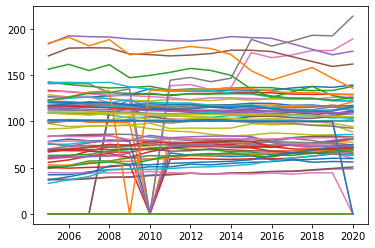

[[ 1.     0.259  0.134  0.511  0.137  0.148  0.41   0.292  0.078  0.019
   0.04   0.131  0.037  0.036 -0.399 -0.405 -0.216 -0.314  0.137  0.052
   0.238  0.247 -0.421 -0.406  0.009]
 [ 0.259  1.     0.712  0.624 -0.823 -0.813 -0.294 -0.456 -0.625 -0.737
  -0.876 -0.817 -0.893 -0.887  0.56   0.508  0.752  0.727  0.801  0.765
   0.592  0.615 -0.488 -0.379 -0.797]
 [ 0.134  0.712  1.     0.674 -0.657 -0.62  -0.721 -0.821 -0.482 -0.531
  -0.582 -0.482 -0.714 -0.708  0.414  0.556  0.809  0.692  0.588  0.625
   0.168  0.166 -0.361 -0.28  -0.733]
 [ 0.511  0.624  0.674  1.    -0.334 -0.339 -0.153 -0.33  -0.439 -0.441
  -0.3   -0.203 -0.456 -0.438 -0.084 -0.093  0.405  0.404  0.566  0.52
   0.065  0.086 -0.555 -0.448 -0.602]
 [ 0.137 -0.823 -0.657 -0.334  1.     0.995  0.556  0.625  0.744  0.865
   0.945  0.888  0.96   0.953 -0.857 -0.807 -0.798 -0.794 -0.61  -0.664
  -0.391 -0.409  0.112  0.001  0.683]
 [ 0.148 -0.813 -0.62  -0.339  0.995  1.     0.523  0.605  0.766  0.883
   0.94   0.892  0.

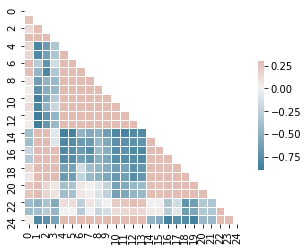

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# %%
def load_data():
    args = []
    prod_df = pd.read_csv('./data/productivity.csv')
    prod_new_df = pd.read_csv('./data/productivity_new.csv')
    sentiment_df = pd.read_csv('./data/sentiment.csv')
    hours_worked_df = pd.read_csv('./data/lfsa_ewhun2_1_Data.csv')
    productivity_df = pd.read_csv('./data/GDP_per_quarter.csv') 
    unem_df = pd.read_csv('./data/unem.csv')
    covid_df = pd.read_csv('./data/DataPerWeek.csv')
    unem_df.fillna(0)
    productivity_df.fillna(0)
    sentiment_df.fillna(0)
    prod_df.fillna(0)
    covid_df.fillna(0)
    args += [prod_df, sentiment_df, hours_worked_df, prod_new_df, productivity_df, unem_df, covid_df]
    return args

# %%
args = load_data()
prod_df, sentiment_df, hours_worked_df, prod_new_df, productivity_df, unem_df, covid_df = args
for i in np.linspace(2005, 2020, 16, endpoint=True):
    prod_df[[str(int(i))]] = prod_df[[str(int(i))]].apply(pd.to_numeric, errors="coerce")
print(prod_df.head(), sentiment_df.head(), hours_worked_df.head(), prod_new_df.head(), productivity_df.head(), unem_df.head(), covid_df.head())

#%%
prod_data = prod_df.iloc[0:71, 2:-1].replace(np.nan, 0).to_numpy(dtype = np.float64).T
time_data = np.repeat(np.array([np.linspace(2005, 2020, 16)]).transpose(), 71, 1)
plt.plot(time_data, prod_data)
plt.show()

#%%
corr = np.round(np.corrcoef(prod_df.iloc[0:25, 2:-1].replace(np.nan, 0).to_numpy(dtype = np.float16)), 3)
mask = np.triu(np.ones_like(corr, dtype=bool))
print(corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
#%%
prod_df.head(), productivity_df.head()

#%%
def load_df(file_name):
    df = pd.read_excel(file_name, sheet_name='Sheet 1')
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df.replace(':', np.nan, inplace=True)
    df.index = df.iloc[:, 0]
    df.drop(df.columns[[0]], axis=1, inplace=True)
    for i in df.columns[:]:
        df[i] = df[i].apply(pd.to_numeric, errors="coerce")
    df.interpolate(method='linear', inplace=True, axis = 1)
    return df

def create_per_employeer(GDP_df, HW_df, employees_df):
    ''' This is a function to create a dataframe with the per-employee GDP and per hour worked '''
    cols =(list(set(GDP_df.columns) and set(employees_df.columns) and set(HW_df.columns)))
    cols.sort()
    idx = cols.pop()
    per_employee_df = pd.DataFrame(index=GDP_df.index, columns=cols)
    per_HW_df = pd.DataFrame(index=GDP_df.index, columns=cols)
    for i in cols:
        per_employee_df[i] = GDP_df[i]/employees_df[i]
        per_HW_df[i] = per_employee_df[i]/HW_df[i]
    return per_employee_df, per_HW_df

GDP_df =  load_df('./data/GDP_per_quarter_2.xlsx') * 1e6
HW_df = load_df('./data/hours_worked.xlsx')
employees_df = load_df('./data/Employees.xlsx') * 1e3
per_employee_df, per_HW_df = create_per_employeer(GDP_df, HW_df, employees_df)


In [3]:
per_HW_df
per_HW_df.drop(index='Albania'  , inplace=True)
per_HW_df.drop(index='Bosnia and Herzegovina'  , inplace=True)
per_HW_df.drop(index='Kosovo (under United Nations Security Council Resolution 1244/99)'  , inplace=True)



In [4]:
per_HW_df = per_HW_df.rename(index={'Germany (until 1990 former territory of the FRG)': 'Germany'})
per_HW_df

,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,2010-Q2,...,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3
TIME,,,,,,,,,,,,,,,,,,,,,
Belgium,611.402642,650.509000,611.189001,643.449734,609.283943,621.255617,609.988497,665.392445,616.821551,653.559524,...,781.186857,751.422297,826.953821,757.363015,697.283950,740.861798,818.986723,798.488287,832.346996,810.219452
Bulgaria,64.485616,73.585609,83.978307,84.170255,67.164116,78.884587,85.638898,89.906787,70.283027,83.692961,...,132.850213,140.475386,150.054807,120.599117,132.878265,150.262363,158.008789,129.145951,148.563718,169.056203
Czechia,213.788847,237.927883,249.455512,234.787323,200.832967,220.343577,232.028277,237.178025,219.683756,242.016209,...,327.919628,333.933911,343.652461,311.266007,294.832550,324.634480,335.597217,319.635254,358.684483,362.109816
Denmark,678.865532,702.741710,698.890381,719.966763,683.246776,694.388128,699.560334,749.470180,725.845460,758.798584,...,922.540572,899.795253,928.473043,906.720783,895.945101,924.479816,962.315027,906.093079,943.762778,936.824282
Germany,533.261691,537.787264,526.458031,525.027097,498.587068,498.165814,516.895246,521.901949,526.844000,530.364765,...,662.946576,670.291155,670.776516,653.168535,593.935393,661.429813,689.269713,671.321564,679.806980,704.338582
Estonia,171.701788,190.377468,182.534316,178.910157,164.867715,176.504979,169.971297,183.658263,175.466804,191.819752,...,330.497382,328.107378,339.227333,302.046534,315.120648,329.468547,347.572388,323.745433,362.060103,380.556094
Ireland,730.837838,712.962459,709.483959,717.768395,729.491893,737.183130,730.276180,725.745522,751.570211,748.128309,...,1195.186922,1296.389764,1293.331757,1306.859698,1236.788105,1436.662633,1338.430432,1476.221373,1412.989267,1531.442622
Greece,450.237773,475.350999,493.613691,494.032784,431.791418,479.375864,484.782423,510.227724,454.466483,467.887041,...,412.272885,439.291495,417.200137,376.636277,352.259744,396.261942,387.377776,397.830785,403.502943,439.779489
Spain,404.288417,428.318029,407.299761,448.923237,417.554579,441.016492,422.911119,459.404170,432.763968,454.549890,...,508.530716,485.840385,519.190295,470.499049,433.278550,470.792687,498.144841,469.709164,492.792130,472.956635


In [5]:
per_HW_df['Average GDP'] = per_HW_df.iloc[:,:57].mean(axis=1, skipna=True)
per_HW_df

,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,2010-Q2,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,Average GDP
TIME,,,,,,,,,,,,,,,,,,,,,
Belgium,611.402642,650.509000,611.189001,643.449734,609.283943,621.255617,609.988497,665.392445,616.821551,653.559524,...,751.422297,826.953821,757.363015,697.283950,740.861798,818.986723,798.488287,832.346996,810.219452,709.630729
Bulgaria,64.485616,73.585609,83.978307,84.170255,67.164116,78.884587,85.638898,89.906787,70.283027,83.692961,...,140.475386,150.054807,120.599117,132.878265,150.262363,158.008789,129.145951,148.563718,169.056203,109.098870
Czechia,213.788847,237.927883,249.455512,234.787323,200.832967,220.343577,232.028277,237.178025,219.683756,242.016209,...,333.933911,343.652461,311.266007,294.832550,324.634480,335.597217,319.635254,358.684483,362.109816,269.340377
Denmark,678.865532,702.741710,698.890381,719.966763,683.246776,694.388128,699.560334,749.470180,725.845460,758.798584,...,899.795253,928.473043,906.720783,895.945101,924.479816,962.315027,906.093079,943.762778,936.824282,829.040914
Germany,533.261691,537.787264,526.458031,525.027097,498.587068,498.165814,516.895246,521.901949,526.844000,530.364765,...,670.291155,670.776516,653.168535,593.935393,661.429813,689.269713,671.321564,679.806980,704.338582,597.360827
Estonia,171.701788,190.377468,182.534316,178.910157,164.867715,176.504979,169.971297,183.658263,175.466804,191.819752,...,328.107378,339.227333,302.046534,315.120648,329.468547,347.572388,323.745433,362.060103,380.556094,248.627246
Ireland,730.837838,712.962459,709.483959,717.768395,729.491893,737.183130,730.276180,725.745522,751.570211,748.128309,...,1296.389764,1293.331757,1306.859698,1236.788105,1436.662633,1338.430432,1476.221373,1412.989267,1531.442622,987.395038
Greece,450.237773,475.350999,493.613691,494.032784,431.791418,479.375864,484.782423,510.227724,454.466483,467.887041,...,439.291495,417.200137,376.636277,352.259744,396.261942,387.377776,397.830785,403.502943,439.779489,448.134528
Spain,404.288417,428.318029,407.299761,448.923237,417.554579,441.016492,422.911119,459.404170,432.763968,454.549890,...,485.840385,519.190295,470.499049,433.278550,470.792687,498.144841,469.709164,492.792130,472.956635,470.194131


In [6]:
age = pd.read_csv(r'/home/katia/Downloads/datasets/EAP_TEAP_SEX_AGE_NB_Q-filtered-2022-04-022.csv')
age = age[['ref_area.label','classif1.label','time','obs_value' ]]
#prod = prod[['geo', 'TIME_PERIOD','OBS_VALUE']]
# age
df_age = age.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# df_education.drop(index='Austria'  , inplace=True)
df_age

time                                2008Q1                             \
classif1.label  Age (10-year bands): 15-24 Age (10-year bands): 25-34   
ref_area.label                                                          
Australia                         2128.719                   2420.988   
Belgium                            426.200                   1223.900   
Bulgaria                           290.800                    806.300   
Croatia                            189.400                    504.800   
Cyprus                              39.600                    110.700   
Czechia                            407.200                   1408.000   
Denmark                            414.700                    588.400   
Estonia                             73.200                    154.900   
Finland                            301.500                    562.400   
France                            2799.500                   6765.200   
Germany                           5006.000                   7948.100   
Greece                             373.400                   1415.200   
Hungary                            302.500                   1184.000   
Iceland                             28.600                     37.700   
Ireland                            434.000                    662.100   
Italy                             1819.300                   6133.700   
Latvia                             148.100                    255.600   
Lithuania                          136.300                    347.500   
Luxembourg                          14.200                     55.400   
Malta                               29.100                     47.000   
Montenegro                             NaN                        NaN   
Netherlands                       1366.600                   1804.400   
North Macedonia                    113.968                    249.961   
Norway                             364.900                    536.000   
Poland                            1805.300                   4952.800   
Portugal                           496.000                   1407.500   
Romania                            914.900                   2661.200   
Serbia                                 NaN                        NaN   
Slovakia                           283.800                    763.100   
Slovenia                           100.200                    277.600   
Spain                             2371.600                   6770.800   
Sweden                             586.400                   1011.000   
Switzerland                            NaN                        NaN   
Turkey                            4036.500                   7178.100   
United Kingdom                    4643.600                   6773.200   

time                                                                   \
classif1.label  Age (10-year bands): 35-44 Age (10-year bands): 45-54   
ref_area.label                                                          
Australia                         2536.332                   2408.168   
Belgium                           1396.100                   1245.200   
Bulgaria                           972.800                    926.900   
Croatia                            498.500                    473.900   
Cyprus                              98.600                     88.900   
Czechia                           1332.800                   1271.000   
Denmark                            742.100                    655.000   
Estonia                            166.200                    166.600   
Finland                            630.200                    677.700   
France                            7852.900                   7268.700   
Germany                          11696.300                  10567.500   
Greece                            1424.200                   1121.200   
Hungary                           1170.900                   1051.600   
Iceland                             39.800               

In [7]:
_1524_employers = age[(age['classif1.label'] == 'Age (10-year bands): 15-24')]
_1524_employers = _1524_employers.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# basic_education = basic_education.pct_change(axis= 'columns')
_1524_employers['Employers Average'] = _1524_employers.iloc[:,:57].mean(axis=1, skipna=True)


In [8]:
_2534_employers = age[(age['classif1.label'] == 'Age (10-year bands): 25-34')]
_2534_employers = _2534_employers.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# basic_education = basic_education.pct_change(axis= 'columns')
_2534_employers['Employers Average'] = _2534_employers.iloc[:,:57].mean(axis=1, skipna=True)


In [9]:
_3544_employers = age[(age['classif1.label'] == 'Age (10-year bands): 35-44')]
_3544_employers = _3544_employers.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# basic_education = basic_education.pct_change(axis= 'columns')
_3544_employers['Employers Average'] = _3544_employers.iloc[:,:57].mean(axis=1, skipna=True)


In [10]:
_4554_employers = age[(age['classif1.label'] == 'Age (10-year bands): 45-54')]
_4554_employers = _4554_employers.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# basic_education = basic_education.pct_change(axis= 'columns')
_4554_employers['Employers Average'] = _4554_employers.iloc[:,:57].mean(axis=1, skipna=True)


In [11]:
_5564_employers = age[(age['classif1.label'] == 'Age (10-year bands): 55-64')]
_5564_employers = _5564_employers.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# basic_education = basic_education.pct_change(axis= 'columns')
_5564_employers['Employers Average'] = _5564_employers.iloc[:,:57].mean(axis=1, skipna=True)


In [12]:
over65_employers = age[(age['classif1.label'] == 'Age (10-year bands): 65+')]
over65_employers = over65_employers.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# basic_education = basic_education.pct_change(axis= 'columns')
over65_employers['Employers Average'] = over65_employers.iloc[:,:57].mean(axis=1, skipna=True)


In [13]:
total = age[(age['classif1.label'] == 'Age (10-year bands): Total')]
total = total.pivot_table('obs_value', index = ['ref_area.label'],columns = ['time', 'classif1.label'] )
# basic_education = basic_education.pct_change(axis= 'columns')
total['Total Averadge'] = total.iloc[:,:57].mean(axis=1, skipna=True)
total

time,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,...,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,Total Averadge
classif1.label,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,...,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,Age (10-year bands): Total,
ref_area.label,,,,,,,,,,,,,,,,,,,,,
Australia,11102.854,11188.874,11226.999,11303.811,11403.289,11436.576,11423.532,11503.873,11546.397,11578.147,...,13667.123,13730.612,13239.333,13475.642,13754.792,13824.427,13847.706,13611.569,13761.54,12490.880839
Belgium,4786.500,4712.300,4838.000,4780.400,4796.800,4751.000,4809.000,4844.300,4890.500,4834.100,...,5105.300,5085.700,5008.700,5156.400,5087.700,5054.900,5144.500,5271.700,5241.10,4964.450000
Bulgaria,3518.500,3579.100,3602.400,3541.200,3484.800,3522.400,3514.500,3444.400,3375.400,3441.100,...,3361.100,3256.100,3271.800,3333.600,3299.900,3232.700,3245.200,3285.000,3227.20,3364.291071
Croatia,1900.900,1933.900,1971.400,1936.500,1928.100,1943.700,1931.800,1936.500,1924.300,1897.000,...,1804.500,1772.400,1782.800,1813.800,1798.500,1808.000,1831.400,1818.300,NaN,1860.098182
Cyprus,397.900,396.500,396.000,399.000,394.500,403.700,406.900,413.500,417.100,422.000,...,449.800,449.900,448.500,452.200,456.100,453.600,466.500,472.300,473.50,430.811538
Czechia,5202.900,5223.400,5238.700,5264.200,5249.600,5275.200,5308.700,5312.300,5251.700,5255.200,...,5413.600,5383.400,5338.700,5387.000,5378.700,5344.900,5329.800,5402.800,5378.00,5319.314286
Denmark,2879.900,2919.300,2933.000,2921.700,2914.500,2923.300,2923.700,2858.900,2874.200,2893.100,...,3045.100,3021.500,2981.900,3046.200,3041.400,3026.100,3051.200,3080.400,3090.80,2932.278571
Estonia,685.200,682.400,703.200,704.600,686.800,679.900,696.900,684.200,685.500,681.200,...,700.500,694.300,683.600,698.900,703.900,694.000,693.300,702.500,698.90,687.208929


In [14]:
combine1 = total[['Total Averadge']]
combine1['1524 Employers Average'] = (_1524_employers['Employers Average']  / total['Total Averadge']) *100
combine1['2544 Employers Average'] = ((_3544_employers['Employers Average'] + _2534_employers['Employers Average'])/ total['Total Averadge'])*100
combine1['45 plus Employers Average'] = ((_4554_employers['Employers Average'] + over65_employers['Employers Average'])  / total['Total Averadge'])*100
# combine['Eldery Employers Average'] = (eldery__employers['Old Age Employers Average'] / total['Total Averadge Employees'])*100

combine1

<ipython-input-14-78e9d1dc3805>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine1['1524 Employers Average'] = (_1524_employers['Employers Average']  / total['Total Averadge']) *100
<ipython-input-14-78e9d1dc3805>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine1['2544 Employers Average'] = ((_3544_employers['Employers Average'] + _2534_employers['Employers Average'])/ total['Total Averadge'])*100
<ipython-input-14-78e9d1dc3805>:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

time,Total Averadge,1524 Employers Average,2544 Employers Average,45 plus Employers Average
classif1.label,,,,
ref_area.label,,,,
Australia,12490.880839,16.894032,44.760718,24.309777
Belgium,4964.450000,8.075380,51.332546,27.265285
Bulgaria,3364.291071,6.090224,49.700133,27.318269
Croatia,1860.098182,8.781355,51.899509,25.633935
Cyprus,430.811538,9.062056,53.340743,24.130219
Czechia,5319.314286,6.454611,51.316194,26.916198
Denmark,2932.278571,14.700964,42.529761,26.698460
Estonia,687.208929,8.789436,46.769671,27.471371


In [15]:
df1 = (per_HW_df[['Average GDP']])
# corr = df3.corr(aggregate)
# print(corr)
df1['1524 Employers Average'] = combine1[['1524 Employers Average']]
df1['2544 Age Employers Average'] = combine1[['2544 Employers Average']]
df1['45 plus Employers Average'] = combine1[['45 plus Employers Average']]
# df['Eldery Employers Average']= combine[['Eldery Employers Average']]


df1

<ipython-input-15-90a351f22fb2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['1524 Employers Average'] = combine1[['1524 Employers Average']]
<ipython-input-15-90a351f22fb2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['2544 Age Employers Average'] = combine1[['2544 Employers Average']]
<ipython-input-15-90a351f22fb2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Average GDP,1524 Employers Average,2544 Age Employers Average,45 plus Employers Average
TIME,,,,
Belgium,709.630729,8.075380,51.332546,27.265285
Bulgaria,109.098870,6.090224,49.700133,27.318269
Czechia,269.340377,6.454611,51.316194,26.916198
Denmark,829.040914,14.700964,42.529761,26.698460
Germany,597.360827,10.398460,42.911399,28.977888
Estonia,248.627246,8.789436,46.769671,27.471371
Ireland,987.395038,13.158156,50.656564,23.545109
Greece,448.134528,6.087452,54.094960,27.181201
Spain,470.194131,7.535071,52.683958,26.050192


In [16]:
df1.corr()

,Average GDP,1524 Employers Average,2544 Age Employers Average,45 plus Employers Average
Average GDP,1.000000,0.384408,-0.343206,0.071207
1524 Employers Average,0.384408,1.000000,-0.493603,-0.549804
2544 Age Employers Average,-0.343206,-0.493603,1.000000,-0.358602
45 plus Employers Average,0.071207,-0.549804,-0.358602,1.000000


In [17]:
df1.to_csv('age_df.csv', index=True)
